In [ ]:
"""
This cell imports all necessary libraries and modules for data analysis, visualization, 
machine learning model building, and handling imbalanced datasets. 
It includes imports for numpy, pandas, matplotlib, seaborn, scikit-learn, imbalanced-learn, 
and utility functions. Warnings are also suppressed for cleaner output.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, f1_score
from copy import deepcopy

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

from warnings import filterwarnings
filterwarnings('ignore')


In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:

# Load the digital marketing campaign dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('digital_marketing_campaign_dataset.csv')

In [ ]:
# Display the first 5 rows of the DataFrame to get a quick overview of the data structure and sample values
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [ ]:
# Display the shape of the DataFrame.
# This returns a tuple representing the number of rows and columns in df.
df.shape

(8000, 20)

In [ ]:
"""
Display the data types of each column in the DataFrame `df`.
This helps to understand the structure of the dataset and ensure that
columns have the expected data types for further analysis or modeling.
"""
df.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

In [ ]:
# Display the number of missing values in each column of the DataFrame.
# This helps to identify columns with missing data that may need to be handled before analysis or modeling.
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [ ]:
# Display concise summary of the DataFrame, including index dtype, column dtypes, non-null values, and memory usage.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
# Display descriptive statistics for the DataFrame `df`.
# This provides count, mean, std, min, 25%, 50%, 75%, and max for each numeric column.
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [ ]:
# Count the number of duplicate rows in the DataFrame `df`.
# This helps to identify if there are any repeated records in the dataset.
df.duplicated().sum()

0

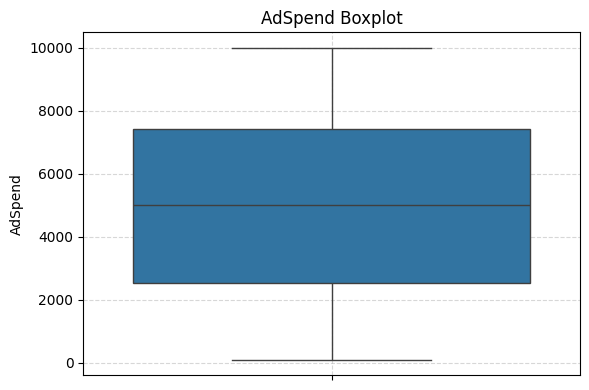

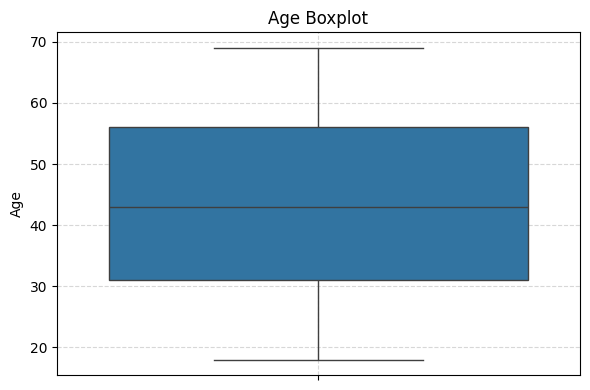

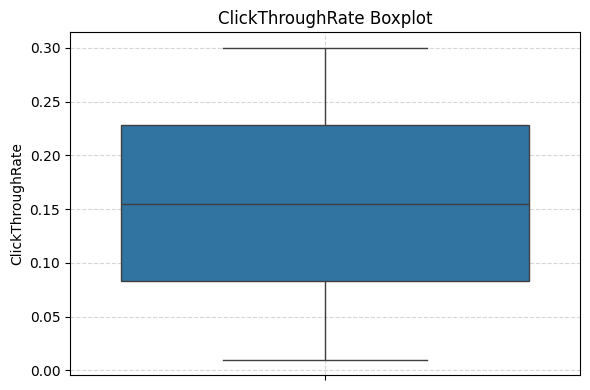

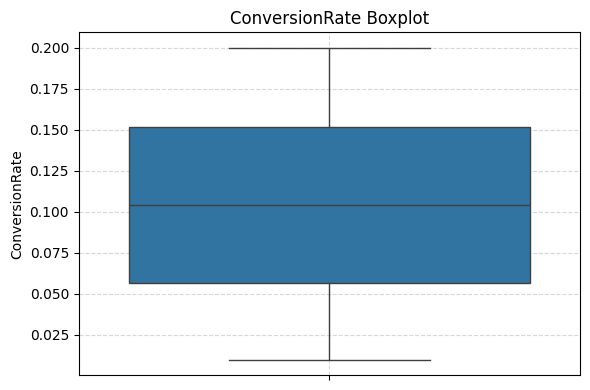

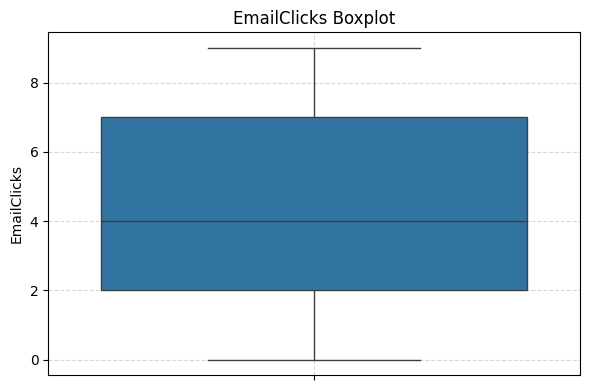

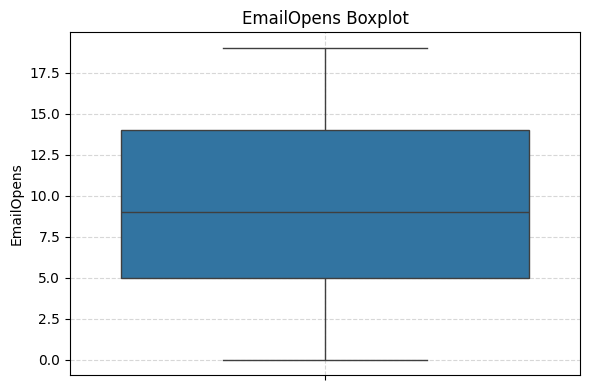

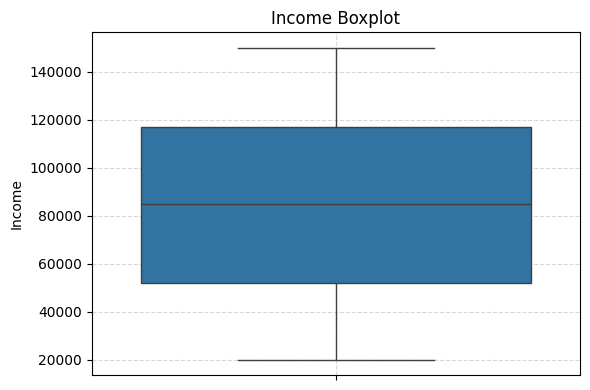

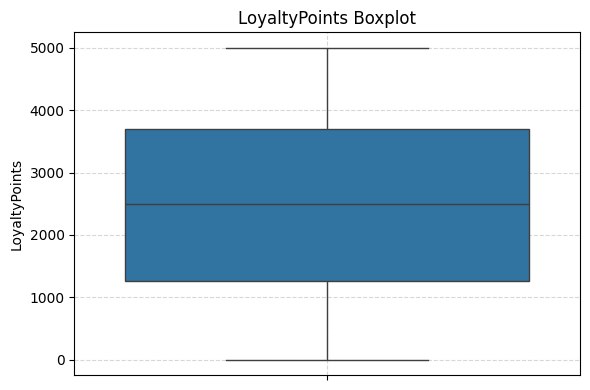

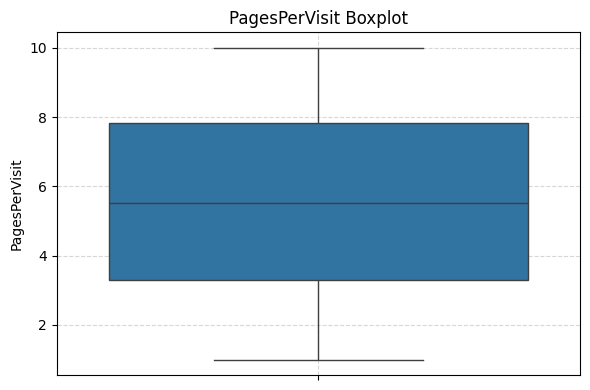

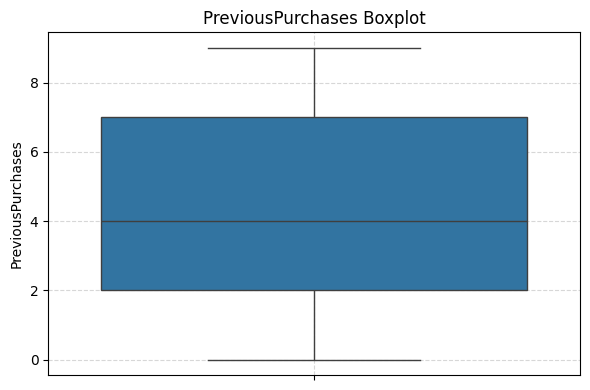

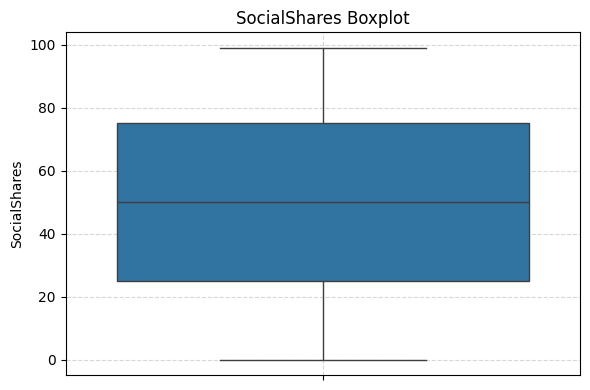

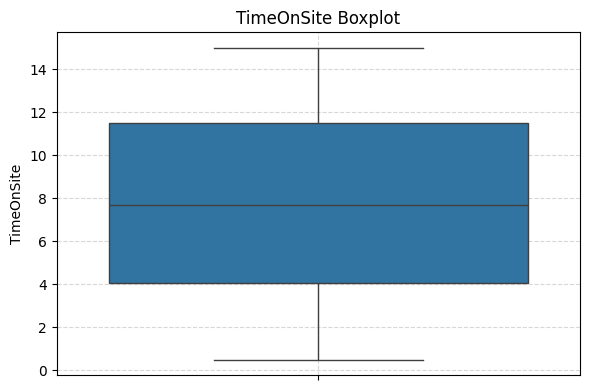

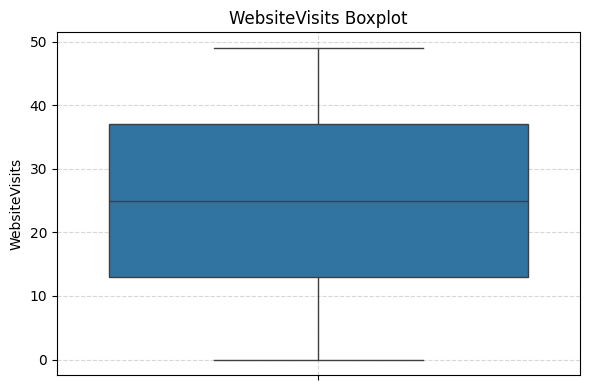

In [ ]:
"""
This cell generates boxplots for each numerical feature in the DataFrame `df`, 
excluding 'CustomerID' and 'Conversion'. Boxplots help visualize the distribution, 
central tendency, and presence of outliers for each feature.
"""
columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['CustomerID', 'Conversion'])

for column in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f'{column} Boxplot')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
"""
Display the unique values for each categorical column in the DataFrame `df`.
This helps to understand the possible categories present in each categorical feature.
"""
for column in Categorical_columns:
  unique_values = df[column].unique()
  print(f"{column}: {unique_values}")
  print()

Gender: ['Female' 'Male']

CampaignChannel: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']

CampaignType: ['Awareness' 'Retention' 'Conversion' 'Consideration']

AdvertisingPlatform: ['IsConfid']

AdvertisingTool: ['ToolConfid']



In [ ]:
# Drop unnecessary columns from the DataFrame.
# 'AdvertisingPlatform', 'AdvertisingTool', and 'CustomerID' are removed as they are not needed for further analysis or modeling.
df.drop(['AdvertisingPlatform', 'AdvertisingTool', 'CustomerID'], axis=1, inplace=True)

<Axes: >

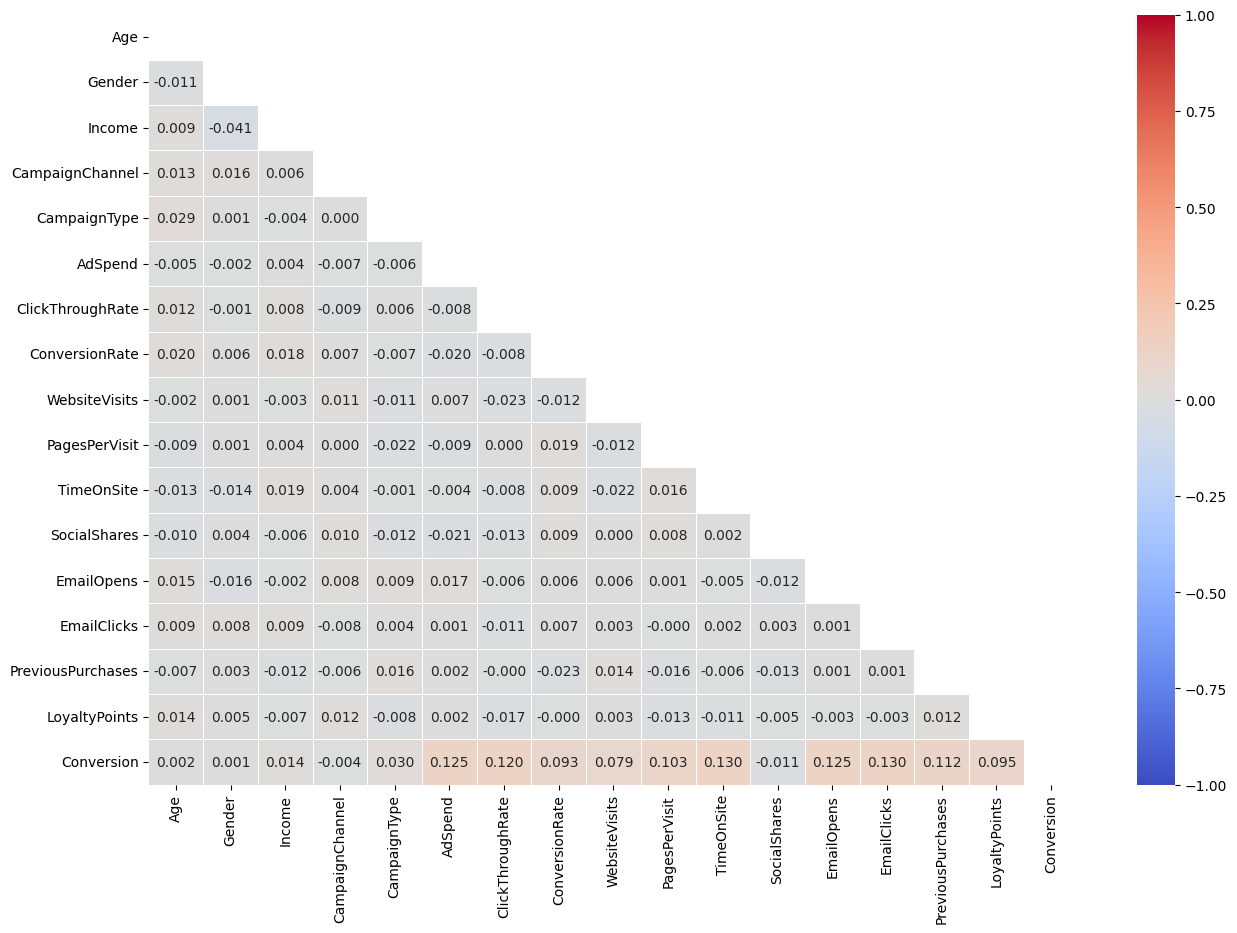

In [37]:
"""
Generate and visualize the Pearson correlation matrix for all numeric columns in the DataFrame `df`.
A heatmap is plotted to show the correlation coefficients between features, with a mask applied to display only the lower triangle for clarity.
"""
corrs = df.corr(method='pearson', numeric_only=True)

mask = np.triu(np.ones_like(corrs, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(
    corrs,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    fmt=".3f",
    linewidths=.5,
    mask=mask
)

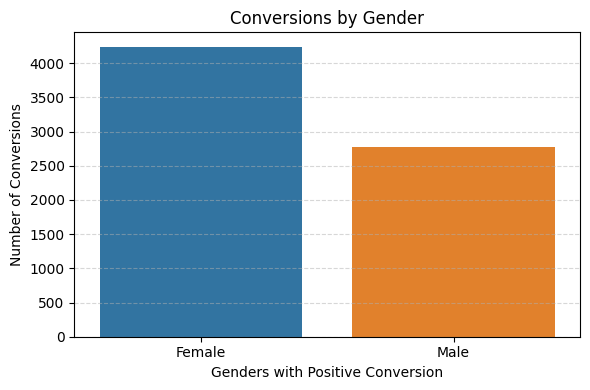

In [ ]:
"""
This cell filters the DataFrame `df` to include only rows where 'Conversion' is 1 (positive conversions).
It then counts the number of conversions by gender and visualizes the result as a bar plot.
This helps to analyze the gender distribution among customers who converted.
"""
filtered_df = df[df['Conversion'] == 1]

genders = filtered_df['Gender'].value_counts().reset_index()
genders.columns = ['Gender', 'Count']

plt.figure(figsize=(6, 4))
sns.barplot(data=genders, x='Gender', y='Count', palette='tab10')
plt.title("Conversions by Gender")
plt.xlabel("Genders with Positive Conversion")
plt.ylabel("Number of Conversions")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

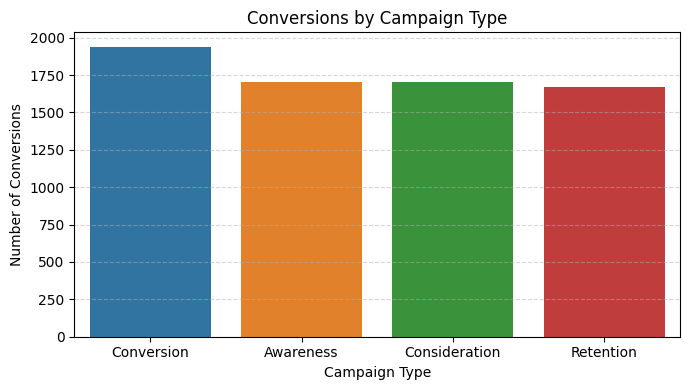

In [ ]:
"""
This cell visualizes the number of conversions by campaign type.
It counts the occurrences of each unique value in the 'CampaignType' column of filtered_df (where Conversion == 1),
then plots the result as a bar plot to show which campaign types are most effective at driving conversions.
"""
campaign_type = filtered_df['CampaignType'].value_counts().reset_index()
campaign_type.columns = ['CampaignType', 'Count']

plt.figure(figsize=(7, 4))
sns.barplot(data=campaign_type, x='CampaignType', y='Count', palette='tab10')
plt.title("Conversions by Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("Number of Conversions")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

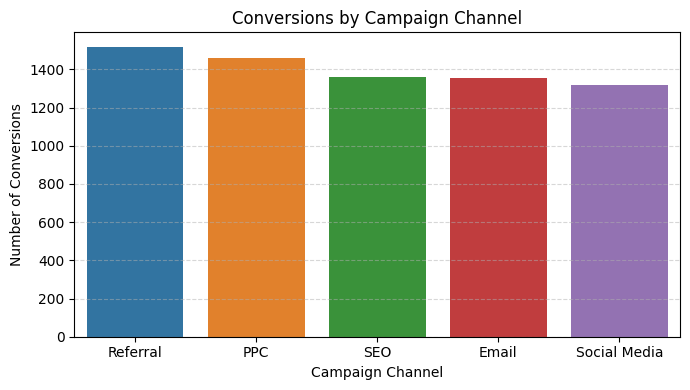

In [ ]:
"""
This cell visualizes the number of conversions by campaign channel.
It counts the occurrences of each unique value in the 'CampaignChannel' column of filtered_df (where Conversion == 1),
then plots the result as a bar plot to show which campaign channels are most effective at driving conversions.
"""
campaign_channels = filtered_df['CampaignChannel'].value_counts().reset_index()
campaign_channels.columns = ['CampaignChannel', 'Count']

plt.figure(figsize=(7, 4))
sns.barplot(data=campaign_channels, x='CampaignChannel', y='Count', palette='tab10')
plt.title("Conversions by Campaign Channel")
plt.xlabel("Campaign Channel")
plt.ylabel("Number of Conversions")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

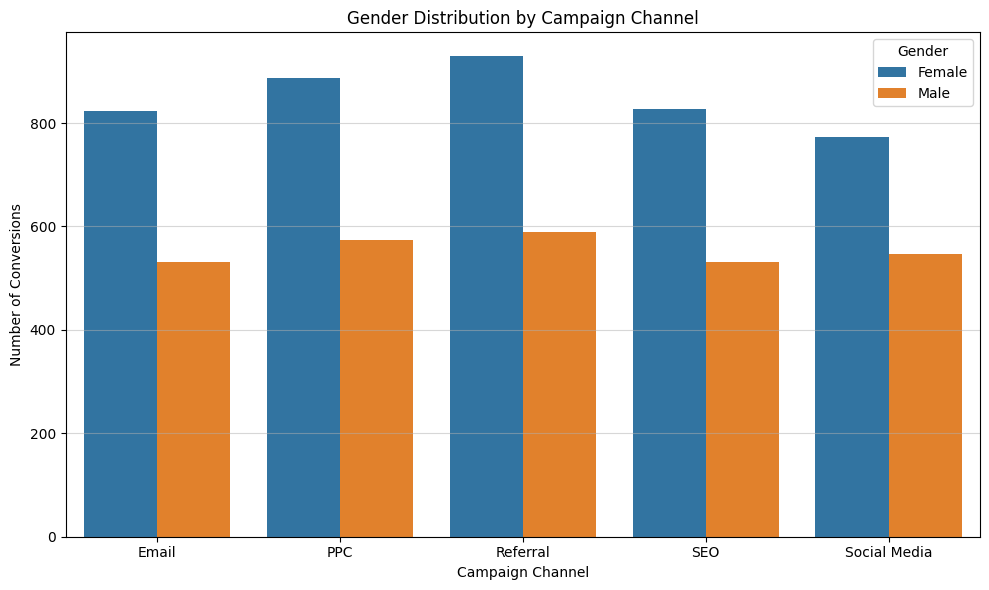

In [ ]:
"""
This cell groups the filtered DataFrame (filtered_df, where Conversion == 1) by both 'CampaignChannel' and 'Gender',
counts the number of conversions for each combination, and visualizes the results as a grouped bar plot.
This helps analyze the gender distribution of conversions across different campaign channels.
"""
campaign_gender_counts = filtered_df.groupby(['CampaignChannel', 'Gender']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_gender_counts, x='CampaignChannel', y='Count', hue='Gender', palette='tab10')
plt.title("Gender Distribution by Campaign Channel")
plt.xlabel("Campaign Channel")
plt.ylabel("Number of Conversions")
plt.grid(True, axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
"""
Calculate and display first-time customer conversion statistics.

This cell filters the DataFrame `df` to identify new customers (those with 'PreviousPurchases' == 0),
calculates the total number of new customers, the number of conversions among them, and the first-time
conversion rate as a percentage. The results are printed for analysis.

Variables:
- new_customers: DataFrame containing only new customers.
- new_customer_conversions: Total number of conversions from new customers.
- total_new_customers: Total number of new customers.
- first_time_conversion_rate: Percentage of new customers who converted.
"""
new_customers = df[df['PreviousPurchases'] == 0]
new_customer_conversions = new_customers["Conversion"].sum()
total_new_customers = len(new_customers)
first_time_conversion_rate = (new_customer_conversions / total_new_customers) * 100

print(f"Total new customers: {total_new_customers}")
print(f"Total conversions from new customers: {new_customer_conversions}")
print(f"First-time conversion rate: {first_time_conversion_rate:.2f}%")

Total new customers: 838
Total conversions from new customers: 648
First-time conversion rate: 77.33%


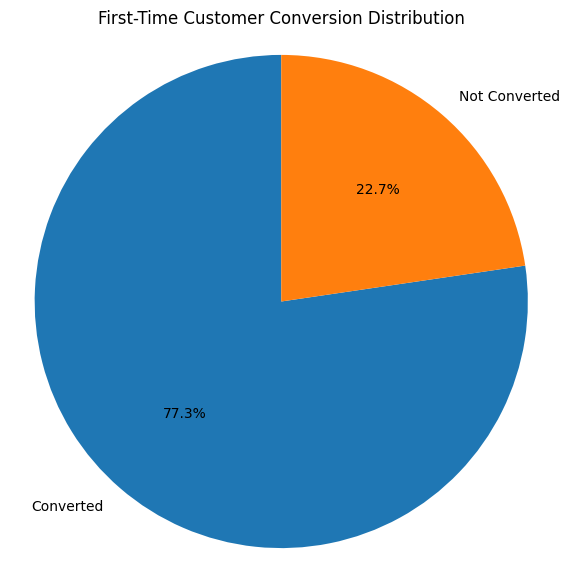

In [ ]:
"""
Visualize the conversion distribution among first-time customers.

This cell creates a pie chart showing the proportion of first-time customers who converted
versus those who did not. It uses the variables:
- new_customer_conversions: Number of first-time customers who converted.
- total_new_customers: Total number of first-time customers.

The chart helps to quickly understand the conversion rate among new customers.
"""

labels = ["Converted", "Not Converted"]
values = [new_customer_conversions, total_new_customers - new_customer_conversions]

colors = ['#1f77b4', '#ff7f0e']  # Example colors from 'tab10'

plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("First-Time Customer Conversion Distribution")
plt.axis('equal')

plt.show()

In [ ]:
"""
Calculate and display the skewness for each numerical feature in the DataFrame `df` 
using the columns specified in the `columns` variable. Skewness measures the asymmetry 
of the distribution of data for each feature.
"""
print(df[columns].skew())

AdSpend              0.019224
Age                 -0.004916
ClickThroughRate     0.011066
ConversionRate       0.012777
EmailClicks          0.023366
EmailOpens           0.007679
Income              -0.011298
LoyaltyPoints        0.016303
PagesPerVisit       -0.012510
PreviousPurchases    0.005712
SocialShares        -0.011357
TimeOnSite           0.014610
WebsiteVisits       -0.017139
dtype: float64


In [ ]:
"""
Display the data types of each column in the DataFrame `df`.
This helps verify the structure of the dataset and ensures that each feature has the expected type.
"""
df.dtypes

Age                    int64
Gender                object
Income                 int64
CampaignChannel       object
CampaignType          object
AdSpend              float64
ClickThroughRate     float64
ConversionRate       float64
WebsiteVisits          int64
PagesPerVisit        float64
TimeOnSite           float64
SocialShares           int64
EmailOpens             int64
EmailClicks            int64
PreviousPurchases      int64
LoyaltyPoints          int64
Conversion             int64
dtype: object

In [ ]:
"""
Display the unique values for each categorical column in the DataFrame `df`.
The categorical columns are determined using pandas' select_dtypes method.
This helps to understand the possible categories present in each categorical feature.
"""
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
  unique_values = df[column].unique()
  print(f"{column}: {unique_values}")
  print()

Gender: ['Female' 'Male']

CampaignChannel: ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']

CampaignType: ['Awareness' 'Retention' 'Conversion' 'Consideration']



In [ ]:
"""
Encode categorical columns in the DataFrame `df` using LabelEncoder.

This cell iterates over each column in `categorical_columns`, applies LabelEncoder to convert
categorical string values into integer codes, and stores each encoder in the `label_encoders` dictionary
for possible inverse transformation or future use. After encoding, it prints the unique encoded values
for each categorical column.

Variables:
- categorical_columns: Index of categorical column names to encode.
- label_encoders: Dictionary mapping column names to their fitted LabelEncoder instances.
"""

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

for column in categorical_columns:
    print(column, df[column].unique())

Gender [0 1]
CampaignChannel [4 0 1 2 3]
CampaignType [0 3 2 1]


In [ ]:
# Display the count of each class (converted and not converted) in the 'Conversion' column of the DataFrame `df`.
# This helps to understand the class distribution for the target variable.
df['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

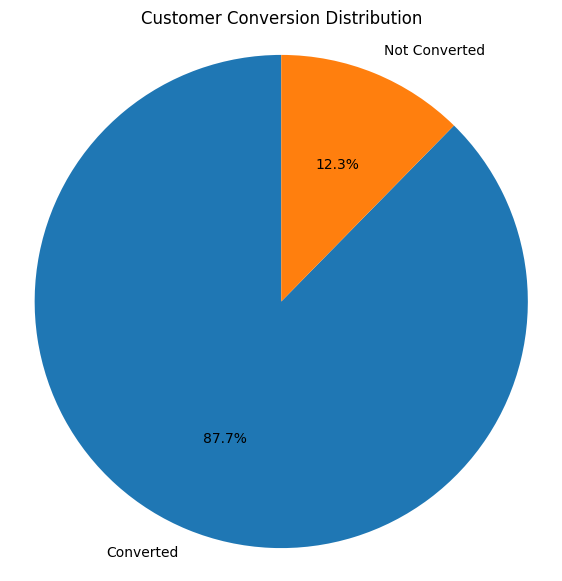

In [ ]:
"""
Visualize the overall customer conversion distribution.

This cell creates a pie chart showing the proportion of customers who converted versus those who did not,
using the 'Conversion' column from the DataFrame `df`. The chart helps to quickly understand the class
distribution of the target variable in the dataset.

Variables:
- labels: List of class labels for the pie chart.
- values: Counts of each class in the 'Conversion' column.
- colors: List of colors for the pie chart slices.
"""

labels = ['Converted', 'Not Converted']
values = df['Conversion'].value_counts()
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(7, 7))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title("Customer Conversion Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# Split the DataFrame `df` into features (X) and target variable (y).
# X contains all columns except 'Conversion', which is the target.
# y contains only the 'Conversion' column, representing the target variable for prediction.
X = df.drop("Conversion", axis=1)
y = df["Conversion"]

In [ ]:
"""
Split the features (X) and target (y) into training and test sets.

- X_train, X_test: Feature sets for training and testing.
- y_train, y_test: Target labels for training and testing.
- test_size=0.2: 20% of the data is used for testing.
- random_state=1234: Ensures reproducibility of the split.
- stratify=y: Preserves the class distribution in both training and test sets.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [ ]:
"""
Apply ADASYN oversampling to balance the classes in the training set.

- Prints the class distribution in y_train before resampling.
- Uses the ADASYN instance (adasyn) to resample X_train and y_train, producing X_train_resampled and y_train_resampled.
- Prints the class distribution in y_train_resampled after resampling.

Variables:
- X_train, y_train: Original training features and labels.
- adasyn: ADASYN oversampler instance.
- X_train_resampled, y_train_resampled: Resampled training features and labels.
"""

unique, counts = np.unique(y_train, return_counts=True)
print("Before:\n", y_train.value_counts())

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
print("After:\n", y_train_resampled.value_counts())

Before:
 Conversion
1    5610
0     790
Name: count, dtype: int64
After:
 Conversion
1    5610
0    2685
Name: count, dtype: int64


In [38]:
"""
Train and evaluate multiple classification models on the dataset.

This cell defines a utility function `model_functionality` to train a given model, evaluate its performance,
and print key metrics such as accuracy, F1 score, and a classification report. It supports both standard
estimators and GridSearchCV objects (using the best estimator after hyperparameter tuning).

A dictionary of models is created, and each model is trained and evaluated on the training and test sets.
The trained models are stored in the `all_trained_models` dictionary for later use or comparison.

Arguments:
- model: The classification model or GridSearchCV object to train.
- x_train, y_train: Training features and labels.
- x_test, y_test: Test features and labels.
- model_name: String name of the model (for display).

Returns:
- class_model: The trained model (best estimator if GridSearchCV).

Variables:
- models: Dictionary of model names and instantiated model objects.
- all_trained_models: Dictionary to store trained models keyed by their names.
"""

def model_functionality(model, x_train, y_train, x_test, y_test, model_name):
    # Check if model is GridSearchCV and get the best estimator
    if isinstance(model, GridSearchCV):
        model.fit(x_train, y_train)
        class_model = model.best_estimator_
        print(f'Best parameters for {model_name}: {model.best_params_}')
    else:
        class_model = model
        class_model.fit(x_train, y_train)

    # Predict on the test set
    predicted_y_test = class_model.predict(x_test)

    # Calculate accuracy
    accuracy_test = accuracy_score(y_test, predicted_y_test)
    print(f'Accuracy on test data: {accuracy_test * 100:.0f}%\n')

    # Calculate F1 Score
    f1_test = f1_score(y_test, predicted_y_test)
    print(f'F1 Score on test data: {f1_test:.2f}\n')

    # Display classification report
    classification = classification_report(y_test, predicted_y_test)
    print(f"Classification Report for {model_name}:\n\n{classification}\n")

    return class_model

# Models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    # 'SVC with GridSearch': GridSearchCV(
    #     estimator=SVC(),
    #     param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    #     scoring='accuracy',
    #     cv=3,  # Reduce cross-validation folds (default is 5, which is slower)
    #     n_jobs=-1
    # )
    # Had to leave it out due to long processing as i was trying all parameters on a large dataset
}

# Train each model and store results
all_trained_models = {}
for name, model in models.items():
    print(f"{'-' * 100}\n\n--{name}--\n")
    trained_model = model_functionality(model, X_train, y_train, X_test, y_test, name)
    all_trained_models[name] = deepcopy(trained_model)

----------------------------------------------------------------------------------------------------

--Logistic Regression--

Accuracy on test data: 88%

F1 Score on test data: 0.93

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.50      0.01      0.01       198
           1       0.88      1.00      0.93      1402

    accuracy                           0.88      1600
   macro avg       0.69      0.50      0.47      1600
weighted avg       0.83      0.88      0.82      1600


----------------------------------------------------------------------------------------------------

--Decision Tree--

Accuracy on test data: 82%

F1 Score on test data: 0.89

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.29      0.33      0.31       198
           1       0.90      0.88      0.89      1402

    accuracy                           0.81      1600
  

In [ ]:
"""
Train and evaluate multiple classification models on the ADASYN-resampled dataset.

This cell defines a utility function `model_functionality` to train a given model, evaluate its performance,
and print key metrics such as accuracy, F1 score, and a classification report. It supports both standard
estimators and GridSearchCV objects (using the best estimator after hyperparameter tuning).

A dictionary of models is created (with some models using class balancing or specific hyperparameters),
and each model is trained and evaluated on the ADASYN-resampled training set and the original test set.
The trained models are stored in the `all_new_trained_models` dictionary for later use or comparison.

Arguments:
- model: The classification model or GridSearchCV object to train.
- x_train, y_train: Training features and labels (here, ADASYN-resampled).
- x_test, y_test: Test features and labels.
- model_name: String name of the model (for display).

Returns:
- class_model: The trained model (best estimator if GridSearchCV).

Variables:
- models: Dictionary of model names and instantiated model objects.
- all_new_trained_models: Dictionary to store trained models keyed by their names.
"""

# Function to train, test, and evaluate the model
def model_functionality(model, x_train, y_train, x_test, y_test, model_name):
    # Check if model is GridSearchCV and get the best estimator
    if isinstance(model, GridSearchCV):
        model.fit(x_train, y_train)
        class_model = model.best_estimator_
        print(f'Best parameters for {model_name}: {model.best_params_}')
    else:
        class_model = model
        class_model.fit(x_train, y_train)

    # Predict on the test set
    predicted_y_test = class_model.predict(x_test)

    # Calculate accuracy
    accuracy_test = accuracy_score(y_test, predicted_y_test)
    print(f'Accuracy on test data: {accuracy_test * 100:.0f}%\n')

    # Calculate F1 Score
    f1_test = f1_score(y_test, predicted_y_test)
    print(f'F1 Score on test data: {f1_test:.2f}\n')

    # Display classification report
    classification = classification_report(y_test, predicted_y_test)
    print(f"Classification Report for {model_name}:\n\n{classification}\n")

    return class_model

# Models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(objective='binary:logistic', gamma=2),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    # 'SVC with GridSearch': GridSearchCV(
    #     estimator=SVC(),
    #     param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    #     scoring='accuracy',
    #     cv=3,  # Reduce cross-validation folds (default is 5, which is slower)
    #     n_jobs=-1
    # )
}

# Train each model and store results
all_new_trained_models = {}
for name, model in models.items():
    print(f"{'-' * 100}\n\n--{name}--\n")
    trained_model = model_functionality(model, X_train_resampled, y_train_resampled, X_test, y_test, name)
    all_new_trained_models[name] = deepcopy(trained_model)

----------------------------------------------------------------------------------------------------

--Logistic Regression--

Accuracy on test data: 85%

F1 Score on test data: 0.92

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.37      0.28      0.32       198
           1       0.90      0.93      0.92      1402

    accuracy                           0.85      1600
   macro avg       0.64      0.61      0.62      1600
weighted avg       0.84      0.85      0.84      1600


----------------------------------------------------------------------------------------------------

--Decision Tree--

Accuracy on test data: 77%

F1 Score on test data: 0.86

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.24      0.42      0.31       198
           1       0.91      0.81      0.86      1402

    accuracy                           0.77      1600
  